In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv('bank.csv', delimiter=';')

# factorize categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    df[col], _ = pd.factorize(df[col])

# define feature and target variables
X = df.drop(columns='y')
y = df['y']

# standard the feature matrix
X = StandardScaler().fit_transform(X)

In [3]:
# initialize an LDA model
lda = LinearDiscriminantAnalysis()

# fit the LDA model on the standardized data
X_r = lda.fit(X, y).transform(X)

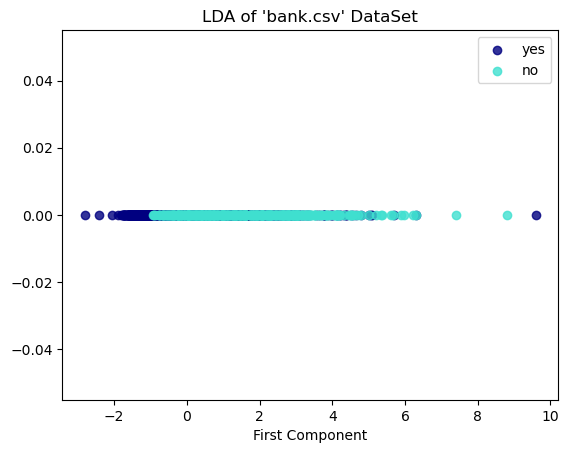

In [4]:
# define colors for plotting classes
colors = ['navy', 'turquoise']
target_names = ['yes', 'no']

# plot the classes in 2D space after LDA transformation
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], np.zeros_like(X_r[y == i, 0]), alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("LDA of 'bank.csv' DataSet")
plt.xlabel('First Component')
plt.show()